In [27]:
%matplotlib inline
import os
import pickle
import cv2
import matplotlib.pyplot as plt

In [3]:
# Parameters
with os.scandir("../test_images/") as it:
    test_image_paths = [ entry.path for entry in it if entry.is_file() ]

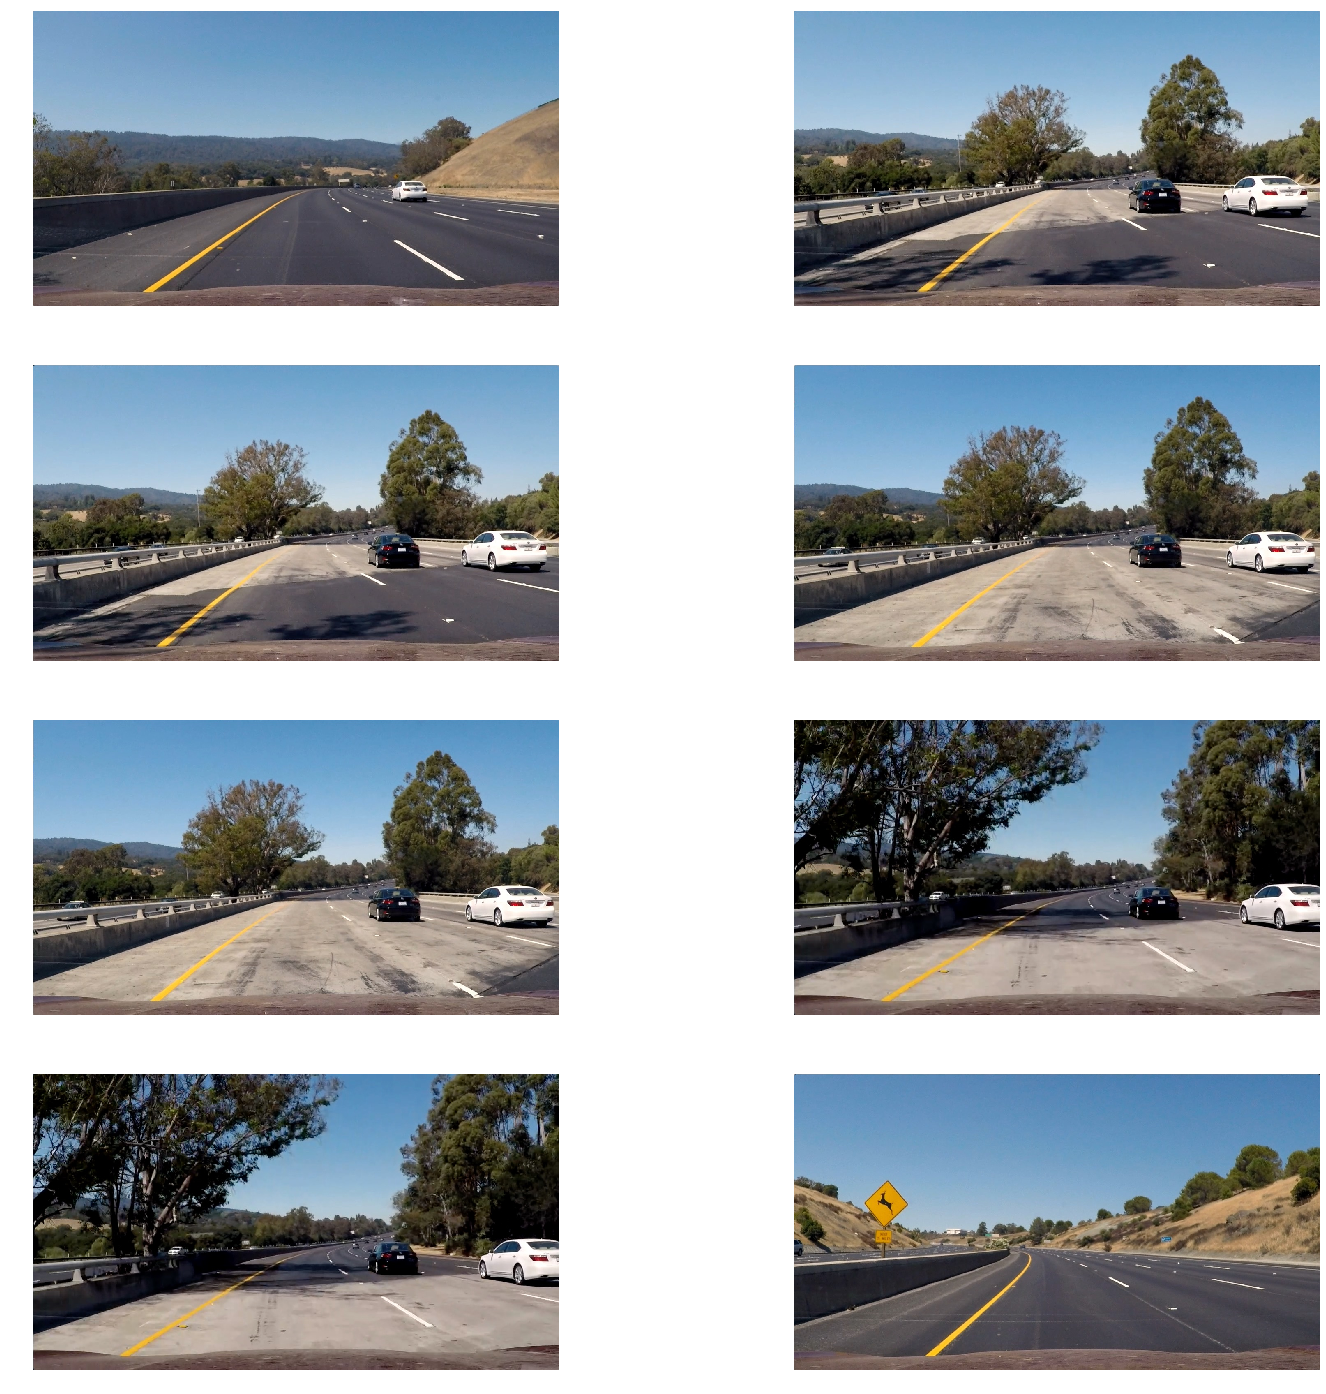

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(25,25))
for i in range (4):
    for j in range(2):
        img = cv2.imread(test_image_paths[i+j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i,j].imshow(img)
        axes[i,j].set_axis_off()

In [28]:
with open("../camera_properties.pkl", "rb") as fd:
    camera_calibration = pickle.load(fd)

In [31]:
mtx = camera_calibration["mtx"]
dist = camera_calibration["dist"]

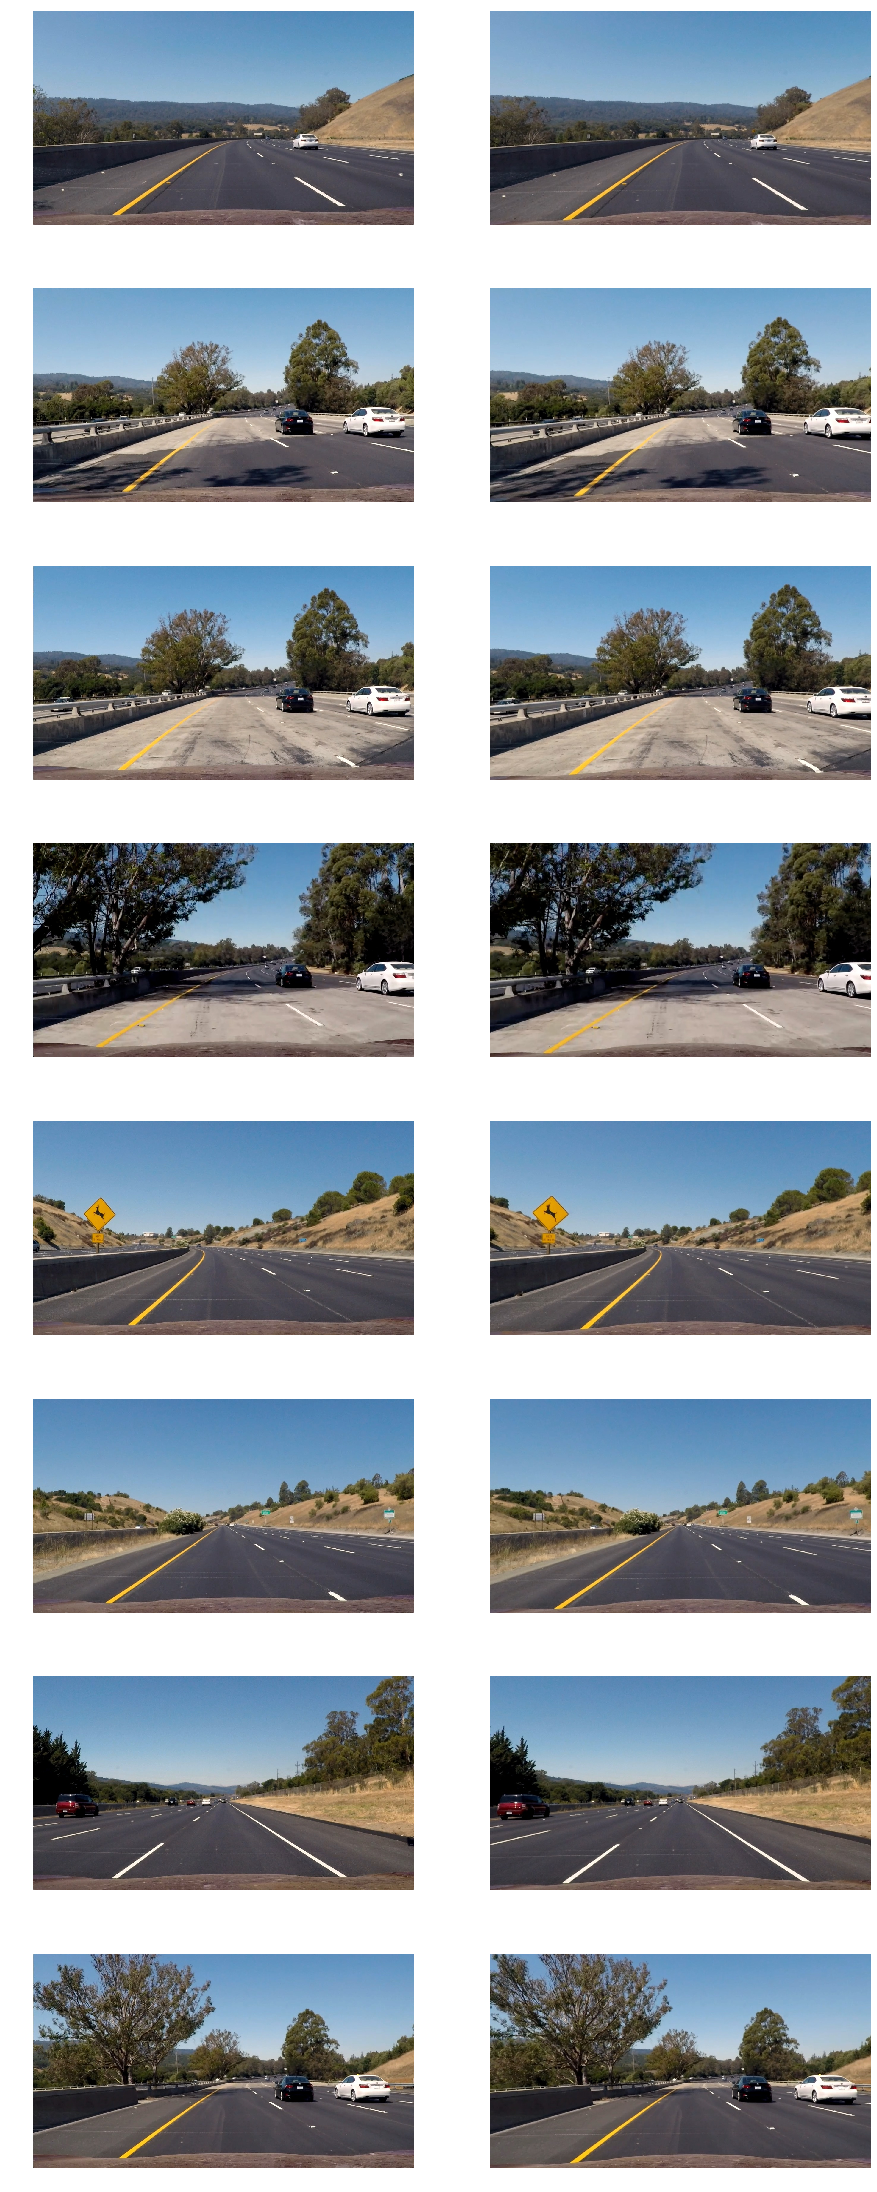

In [57]:
fig, axes = plt.subplots(8, 2, figsize=(15,40))
for i in range (8):
        img = cv2.imread(test_image_paths[i])
        undst_img = cv2.undistort(img, mtx, dist, None, mtx)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        undst_img = cv2.cvtColor(undst_img, cv2.COLOR_BGR2RGB)
        axes[i,0].imshow(img)
        axes[i,0].set_axis_off()
        axes[i,1].imshow(undst_img)
        axes[i,1].set_axis_off()